/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


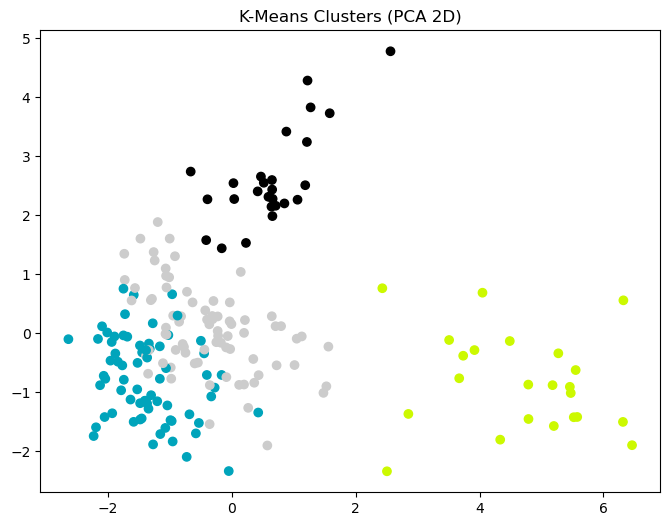

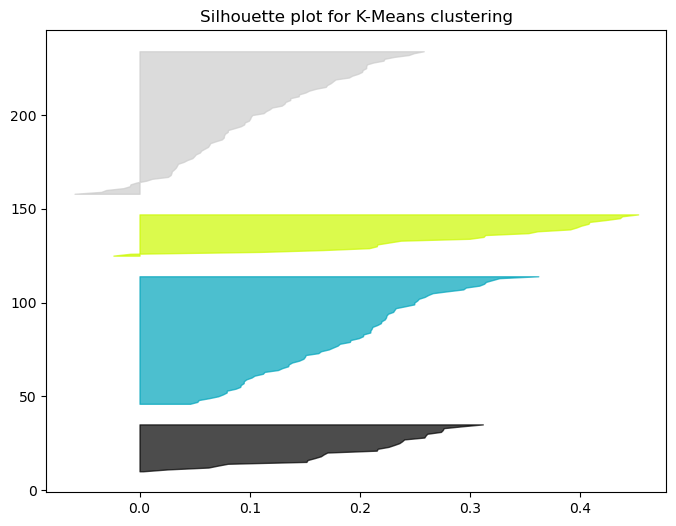

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.803  0.6240    7    -6.764     0       0.0477        0.4510   
1           0.762  0.7030   10    -7.951     0       0.3060        0.2060   
2           0.261  0.0149    1   -27.528     1       0.0419        0.9920   
3           0.722  0.7360    3    -6.994     0       0.0585        0.4310   
4           0.787  0.5720    1    -7.516     1       0.2220        0.1450   
..            ...     ...  ...       ...   ...          ...           ...   
190         0.166  0.0551    9   -19.494     0       0.0520        0.9760   
191         0.862  0.6240    3   -11.630     1       0.0565        0.0192   
192         0.499  0.3510    9   -11.509     0       0.0448        0.9510   
193         0.574  0.7290   10    -5.838     0       0.0965        0.0406   
194         0.747  0.6660   11    -7.845     1       0.1970        0.1300   

     instrumentalness  liveness  valence    tempo  duration_ms  \
0        

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Load your dataset
data = pd.read_csv('data.csv')  # Replace 'your_song_data.csv' with your dataset's file path

# Select the relevant attributes for clustering (exclude 'liked' as it's the target variable)
X = data.drop('liked', axis=1)

# Data preprocessing: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# 2D Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define a list of colors for clusters
cluster_colors = cm.nipy_spectral(np.linspace(0, 1, k))

# Visualize K-Means clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors[kmeans.labels_])
plt.title('K-Means Clusters (PCA 2D)')
plt.show()

# Silhouette Plot
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

# Create a silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    cluster_i_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    cluster_i_silhouette_values.sort()
    size_cluster_i = cluster_i_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cluster_colors[i]  # Use a distinct color for each cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_values, color=color, alpha=0.7)
    y_lower = y_upper + 10
plt.title("Silhouette plot for K-Means clustering")
plt.show()

# Print the entire dataset with cluster labels
print(data)
